In [3]:
from keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras.optimizers import Adagrad
from sklearn.model_selection import GridSearchCV, KFold

In [5]:
forest=pd.read_csv("forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [12]:
forest["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [6]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

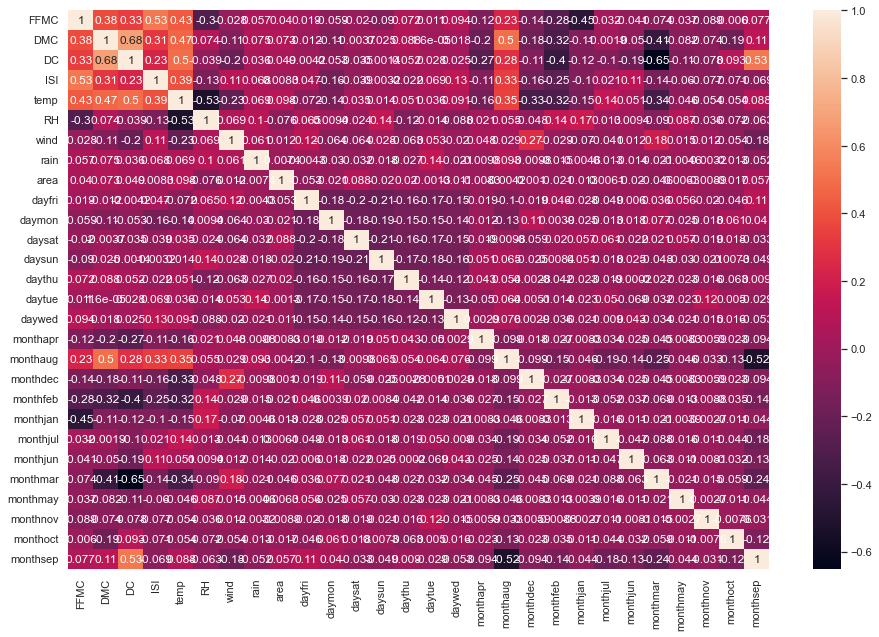

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.heatmap(forest.corr(), annot=True);


Attribute Information:

X : x-axis spatial coordinate within the Montesinho park map: 1 to 9

Y : y-axis spatial coordinate within the Montesinho park map: 2 to 9

month : month of the year: ‘jan’ to ‘dec’

day : day of the week: ‘mon’ to ‘sun’

FFMC : FFMC (Fine Fuel Moisture Code) index from the FWI system: 18.7 to 96.20

DMC : DMC (Duff Moisture Code) index from the FWI system: 1.1 to 291.3

DC : DC (Drought Code) index from the FWI system: 7.9 to 860.6

ISI : ISI (Initial Spread Index) index from the FWI system: 0.0 to 56.10

temp : temperature in Celsius degrees: 2.2 to 33.30

RH : relative humidity in %: 15.0 to 100

wind : wind speed in km/h: 0.40 to 9.40

rain : outside rain in mm/m2 : 0.0 to 6.4

area : the burned area of the forest (in ha): 0.00 to 1090.84


In [13]:
forest.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small


In [16]:
forest["day"].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [21]:
#('mon',"tue",'thu','wed','fri'):"weekdays",('sun','sat'):"weekend"}
forest.replace(dict.fromkeys(['mon',"tue",'thu','wed','fri'],"weekdays"), inplace=True)

In [22]:
forest.replace(dict.fromkeys(['sun','sat'],"weekend"), inplace=True)

In [23]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,weekdays,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,weekdays,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,weekend,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,weekdays,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,weekend,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [25]:
forest.replace({"small":0,"large":1}, inplace=True)

In [26]:
forest.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,weekdays,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,weekdays,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
forest.replace({"weekdays":0,"weekend":1}, inplace=True)

In [28]:
forest.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,0
1,oct,0,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
forest_n=forest.drop("month", axis=1)

In [31]:
forest_n.columns

Index(['day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [34]:
int_variables=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

In [35]:
forest_n[int_variables]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
forest_n[int_variables]=scaler.fit_transform(forest_n[int_variables])

In [37]:
forest_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            517 non-null    int64  
 1   FFMC           517 non-null    float64
 2   DMC            517 non-null    float64
 3   DC             517 non-null    float64
 4   ISI            517 non-null    float64
 5   temp           517 non-null    float64
 6   RH             517 non-null    float64
 7   wind           517 non-null    float64
 8   rain           517 non-null    float64
 9   area           517 non-null    float64
 10  dayfri         517 non-null    int64  
 11  daymon         517 non-null    int64  
 12  daysat         517 non-null    int64  
 13  daysun         517 non-null    int64  
 14  daythu         517 non-null    int64  
 15  daytue         517 non-null    int64  
 16  daywed         517 non-null    int64  
 17  monthapr       517 non-null    int64  
 18  monthaug  

In [40]:
x=forest_n.drop("size_category",axis=1)
y=forest_n["size_category"]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [45]:
from sklearn.linear_model import LogisticRegression
logic=LogisticRegression()

In [47]:
logic.fit(x_train,y_train)

LogisticRegression()

In [48]:
logic.score(x_test,y_test)

0.8461538461538461

With Logistic Regression we got 84% accuracy now we will do wih NN

In [51]:
forest_n.shape

(517, 30)

In [52]:
model=Sequential()
# input layer + 1st hidden layer
model.add(Dense(6, input_dim=29, activation='relu'))
# 2nd hidden layer
model.add(Dense(6, activation='relu'))
# output layer
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 180       
                                                                 
 dense_5 (Dense)             (None, 6)                 42        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile Model
model.compile(optimizer = 'adam', metrics=['accuracy'], loss ='binary_crossentropy')
# Train Model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 10, epochs = 100)

Epoch 1/100
39/39 [==============================] - 1s 5ms/step - loss: 3.7568 - accuracy: 0.7339 - val_loss: 4.2715 - val_accuracy: 0.7231
Epoch 2/100
39/39 [==============================] - 0s 2ms/step - loss: 3.0930 - accuracy: 0.7339 - val_loss: 4.0803 - val_accuracy: 0.7231
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: 2.6891 - accuracy: 0.7287 - val_loss: 2.2322 - val_accuracy: 0.7231
Epoch 4/100
39/39 [==============================] - 0s 3ms/step - loss: 1.7854 - accuracy: 0.7364 - val_loss: 0.6949 - val_accuracy: 0.7231
Epoch 5/100
39/39 [==============================] - 0s 3ms/step - loss: 1.3928 - accuracy: 0.7287 - val_loss: 0.6365 - val_accuracy: 0.7231
Epoch 6/100
39/39 [==============================] - 0s 2ms/step - loss: 1.2777 - accuracy: 0.7235 - val_loss: 0.6120 - val_accuracy: 0.7231
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: 1.1180 - accuracy: 0.7132 - val_loss: 0.6016 - val_accuracy: 0.7231
Epoch 8/100
3

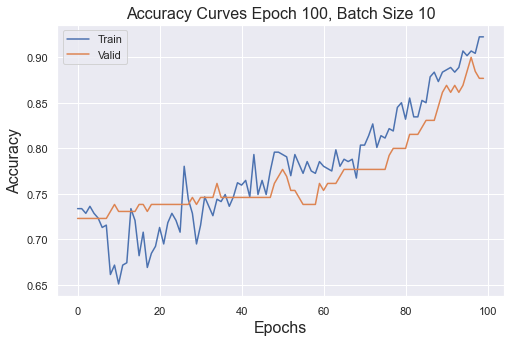

In [54]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100, Batch Size 10', fontsize=16)
plt.show()

In [61]:
# Fit a model and plot learning curve
def fit_model(x_train, y_train, x_test, y_test, n_batch):
# Define Model
    model=Sequential()
    model.add(Dense(6, input_dim=29, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = 'relu'))
# Compile Model
    model.compile(optimizer = 'adam',
    metrics=['accuracy'],
    loss = 'binary_crossentropy')
# Fit Model
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, verbose=10, batch_size=n_batch)
# Plot Learning Curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.legend()
# Create learning curves for different batch sizes
    batch_sizes = [4, 6, 10, 16, 32, 64, 128, 260]
    plt.figure(figsize=(10,15))
    for i in range(len(batch_sizes)):
# Determine the Plot Number
        plot_no = 420 + (i+1)
        plt.subplot(plot_no)
# Fit model and plot learning curves for a batch size
        fit_model(x_train, y_train, x_test, y_test, batch_sizes[i])
# Show learning curves
        plt.show()

In [62]:
fit_model(x_train, y_train, x_test, y_test, n_batch=6)